In [1]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [2]:
"""The dataset of the sequence the cards (cs) were played follows"""
skat_bl_cs_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch_kf.CSV"

skat_bl_cs_data_frame = pd.read_csv(skat_bl_cs_data_path, header=None)

# TODO: convert data to following encoding:
# ♦, ♥, ♠, ♣, {7, 8, 9, Q, K, 10, A}, J/T
skat_bl_cs_data = skat_bl_cs_data_frame

skat_bl_cs_data.columns = ["GameID", "Sd1", "Sd2", "KNr0", "KNr1", "KNr2", "KNr3", "KNr4", "KNr5", "KNr6", "KNr7",
                           "KNr8", "KNr9", "KNr10", "KNr11", "KNr12", "KNr13", "KNr14", "KNr15", "KNr16", "KNr17",
                           "KNr18", "KNr19", "KNr20", "KNr21", "KNr22", "KNr23", "KNr24", "KNr25", "KNr26", "KNr27",
                           "KNr28", "KNr29", "KNr30", "KNr31", "SurrenderedAt"]

In [3]:
# Sanity Checks

0


In [ ]:
print(skat_bl_cs_data_frame.isna().sum().sum())

In [4]:
print(skat_bl_cs_data_frame["GameID"].size)

376344


In [5]:
print(skat_bl_cs_data_frame["GameID"].duplicated().any())

False


In [6]:
skat_bl_table_data = skat_bl_cs_data_frame

head = skat_bl_cs_data.head(n=10)
print(head)


   GameID  Sd1  Sd2  KNr0  KNr1  KNr2  KNr3  KNr4  KNr5  KNr6  ...  KNr23  \
0       1   12   31    21     7    13    11    18    15     9  ...     26   
1       2   31   30     3     7     5     0     6    21     4  ...     22   
2       3    3   13    11    18    28    30     9    19    10  ...      2   
3       4   10   17    24     1    19     3     8    26     0  ...     12   
4       5   10   13    14    12    25     2    28    17    16  ...      9   
5       6   20   28     1     4     2    11    13     0     3  ...      6   
6       7    9   13    16    18    20     9     4    23     7  ...      6   
7       8   28   17    22    19    29     1    28    23    17  ...     10   
8       9   18   20     6    11    10    29     9     8     7  ...     16   
9      11    6   16     0    26     9     3    11     2    30  ...     18   

   KNr24  KNr25  KNr26  KNr27  KNr28  KNr29  KNr30  KNr31  SurrenderedAt  
0      2     20      1      4     24      0     27     31             -1  
1 

In [7]:
"""The table dataset follows"""
skat_bl_table_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch.CSV"

skat_bl_table_data_frame = pd.read_csv(skat_bl_table_data_path, header=None)

skat_bl_table_data_frame.columns = ["IDTable", "Name", "Number", "PlayerID1", "PlayerID2", "PlayerID3", "PlayerID4",
                                    "Player1", "Player2", "Player3", "Player4", "Date", "IDVServer", "Series"]

skat_bl_table_data_frame

,IDTable,Name,Number,PlayerID1,PlayerID2,PlayerID3,PlayerID4,Player1,Player2,Player3,Player4,Date,IDVServer,Series
0,799a2b2e-ae0f-11da-b3fb-8df7c9751e06,2,1,8687,8628,6449,0,FRED42,MIMO46,AHAB,NaN,1141759244,4,4.0
1,7245a47d-ae0f-11da-b3fb-8df7c9751e06,8,6,25444,32580,39208,0,VERFUERTH KLAUS,DER PATE 39,STOERTEBECKER,NaN,1141759232,4,4.0
2,ffc47bc5-ae0f-11da-b3fb-8df7c9751e06,29,26,59765,49816,37776,0,LUSCHENKING,T.K.,BONNIE PARKER,NaN,1141759469,4,4.0
3,7afc2c30-ae0f-11da-b3fb-8df7c9751e06,34,33,25365,37026,25346,0,PATER,FANTASIO17,KRUEMEL96,NaN,1141759247,4,4.0
4,7cdc0fc3-ae0f-11da-b3fb-8df7c9751e06,33,31,39775,42482,8453,0,HARRYHIRSCH,DIKO98,DOKTORBIER,NaN,1141759250,4,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11919,6x7S67QWV3xRF,T11,3,237339,239742,8662,0,TOTTI 48,ELACHEN,HUGO 1005,NaN,1490724005,4,24242.0
11920,6x7S67QWV3xRO,T8,6,37068,240390,279741,0,WOLLE67,SCHACHSPIELER50,POWERPAUL1,NaN,1490724033,4,24242.0
11921,6x7S67QWV3xRD,T2,13,300814,70362,325948,0,SKAT AMATEUR,ELBE,EDUARD DER ZWEITE,NaN,1490724023,4,24242.0
11922,6x7S67QWV3xRK,T5,11,370619,172135,155110,0,PIKDAME1900,SCHROCKI5,MONSCHI1965,NaN,1490724064,4,24242.0


In [8]:
# Sanity Checks

print(skat_bl_table_data_frame.isna().sum())

IDTable          0
Name             0
Number           0
PlayerID1        0
PlayerID2        0
PlayerID3        0
PlayerID4        0
Player1          0
Player2          0
Player3          0
Player4      11924
Date             0
IDVServer        0
Series           3
dtype: int64


In [9]:
print(skat_bl_table_data_frame["IDTable"].size)

11924


In [10]:
print(skat_bl_table_data_frame["IDTable"].duplicated().any())

False


In [11]:
skat_bl_table_data = skat_bl_table_data_frame

head = skat_bl_table_data.head(n=10)
print(head)

                                IDTable Name  Number  PlayerID1  PlayerID2  \
0  799a2b2e-ae0f-11da-b3fb-8df7c9751e06    2       1       8687       8628   
1  7245a47d-ae0f-11da-b3fb-8df7c9751e06    8       6      25444      32580   
2  ffc47bc5-ae0f-11da-b3fb-8df7c9751e06   29      26      59765      49816   
3  7afc2c30-ae0f-11da-b3fb-8df7c9751e06   34      33      25365      37026   
4  7cdc0fc3-ae0f-11da-b3fb-8df7c9751e06   33      31      39775      42482   
5  71c3ca4c-ae0f-11da-b3fb-8df7c9751e06   12      15      29758      20755   
6  7478d833-ae0f-11da-b3fb-8df7c9751e06   19      18      23585      11691   
7  729b3e90-ae0f-11da-b3fb-8df7c9751e06   11       8      22429      24313   
8  729990df-ae0f-11da-b3fb-8df7c9751e06   18      16      27957      17169   
9  750b2d25-ae0f-11da-b3fb-8df7c9751e06   35      34      24470      55811   

   PlayerID3  PlayerID4          Player1      Player2        Player3  Player4  \
0       6449          0           FRED42       MIMO46       

In [31]:
"""The game dataset follows"""

skat_bl_game_data_path = "C:/Users/sasch/Desktop/Uni/Bachelorarbeit/SaschaBenz/data/dl/bl_skattisch_spiel.CSV"

skat_bl_game_data_frame = pd.read_csv(skat_bl_game_data_path, header=None)

skat_bl_game_data_frame.columns = ["GameID", "IDGame", "IDTable", "IDVServer", "StartTime", "EndTime", "PlayerFH",
                                   "PlayerMH", "PlayerBH", "Card1", "Card2", "Card3", "Card4", "Card5", "Card6",
                                   "Card7", "Card8", "Card9", "Card10", "Card11", "Card12", "Card13", "Card14",
                                   "Card15", "Card16", "Card17", "Card18", "Card19", "Card20", "Card21", "Card22",
                                   "Card23", "Card24", "Card25", "Card26", "Card27", "Card28", "Card29", "Card30",
                                   "Card31", "Card32", "CallValueFH", "CallValueMH", "CallValueBH", "PlayerID", "Game",
                                   "With", "Without", "Hand", "Schneider", "SchneiderCalled", "Schwarz",
                                   "SchwarzCalled", "Overt", "PointsPlayer", "Won", "Miscall",
                                   "CardPointsPlayer", "AllPassed", "Surrendered", "PlayerPosAtTableFH",
                                   "PlayerPosAtTableMH", "PlayerPosAtTableBH"]

In [13]:
head = skat_bl_game_data_frame.head(n=10)
print(head)

   GameID                                IDGame  \
0       1  9ff1d7c1-ae0f-11da-b3fb-8df7c9751e06   
1       2  c7c48b9e-ae0f-11da-b3fb-8df7c9751e06   
2       3  f2de7b40-ae0f-11da-b3fb-8df7c9751e06   
3       4  269b9093-ae10-11da-b3fb-8df7c9751e06   
4       5  5206ad6f-ae10-11da-b3fb-8df7c9751e06   
5       6  811f68fb-ae10-11da-b3fb-8df7c9751e06   
6       7  baed1441-ae10-11da-b3fb-8df7c9751e06   
7       8  e2598c37-ae10-11da-b3fb-8df7c9751e06   
8       9  0d643994-ae11-11da-b3fb-8df7c9751e06   
9      10  131c7557-ae11-11da-b3fb-8df7c9751e06   

                                IDTable  IDVServer   StartTime     EndTime  \
0  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759244  1141759309   
1  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759312  1141759376   
2  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759379  1141759448   
3  799a2b2e-ae0f-11da-b3fb-8df7c9751e06          4  1141759451  1141759535   
4  799a2b2e-ae0f-11da-b3fb-8df7c9751e06         

In [29]:
skat_bl_game_data_frame[["CallValueFH", "CallValueMH", "CallValueBH", "PlayerID", "Game",
                         "With", "Without", "Hand", "Schneider", "SchneiderCalled", "Schwarz",
                         "SchwarzCalled", "Overt", "PointsPlayer", "Won", "Miscall",
                         "CardPointsPlayer", "AllPassed", "Surrendered"]].describe()

KeyError: "['Game'] not in index"

In [15]:
skat_bl_game_data_frame[["CallValueFH", "CallValueMH", "CallValueBH", "PlayerPosAtTableFH", "PlayerPosAtTableMH",
                         "PlayerPosAtTableBH"]].describe()

,CallValueFH,CallValueMH,CallValueBH,PlayerPosAtTableFH,PlayerPosAtTableMH,PlayerPosAtTableBH
count,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000,407259.000000
mean,9.116813,9.139501,9.131648,1.000037,1.000081,0.999845
std,11.009870,11.015312,11.012890,0.816457,0.816544,0.816514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,18.000000,18.000000,18.000000,2.000000,2.000000,2.000000
max,96.000000,120.000000,90.000000,2.000000,2.000000,2.000000


In [16]:
print(skat_bl_game_data_frame.isna().sum().sum())

0


In [17]:
print(skat_bl_game_data_frame["GameID"].size)

407259


In [18]:
print(skat_bl_game_data_frame["GameID"].duplicated().any())

False


In [19]:
print(skat_bl_game_data_frame["IDGame"].duplicated().any())

False


In [20]:
skat_bl_game_data_frame["Won"].value_counts(normalize=True)

1    0.786414
0    0.213586
Name: Won, dtype: float64

In [21]:
skat_bl_game_data_frame["Schneider"].value_counts(normalize=True)

0    0.731299
1    0.268701
Name: Schneider, dtype: float64

In [22]:
skat_bl_game_data_frame["Schwarz"].value_counts(normalize=True)

0    0.9588
1    0.0412
Name: Schwarz, dtype: float64

In [32]:
skat_bl_game_data_frame["Game"].value_counts()

24    102087
12     81812
11     66704
10     56240
9      47285
0      30914
23     11334
46      9458
59      1028
35       397
Name: Game, dtype: int64

In [24]:
skat_bl_game_data_frame["AllPassed"].value_counts(normalize=True)

0    0.924093
1    0.075907
Name: AllPassed, dtype: float64

In [25]:
skat_bl_game_data_frame["Miscall"].value_counts(normalize=True)

0    0.998701
1    0.001299
Name: Miscall, dtype: float64

In [26]:
skat_bl_game_data_frame["Surrendered"].value_counts(normalize=True)


0    1.0
Name: Surrendered, dtype: float64

In [27]:
skat_bl_game_data_frame["Miscall"].value_counts(normalize=True)


0    0.998701
1    0.001299
Name: Miscall, dtype: float64

In [28]:
# Data Visualisation

In [50]:
# Create a pie plot showing the relative occurrence of game variants
game_variants = skat_bl_game_data_frame["Game"].value_counts(normalize=True)
game_variants = game_variants.rename(
    index={24: "Grand", 12: "Cross", 11: "Spades", 10: "Hearts", 9: "Diamonds", 0: "AllPassed", 23: "Null",
           46: "Null Ouvert", 59: "Null Ouvert Hand", 35: "Null Hand"})
game_variants

<AxesSubplot:ylabel='Game'>

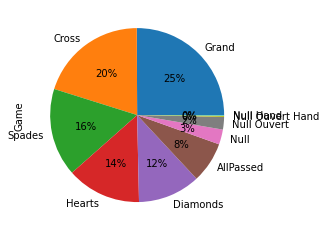

In [55]:
game_variants.plot(kind="pie", y="Game", autopct='%1.0f%%')

In [45]:
# skat_bl_game_data_frame.groupby(["Game"]).sum() #.sum().plot(kind="pie", y="Game")
# skat_bl_game_data_frame["Game"]

Grand               0.250668
Cross               0.200884
Spades              0.163788
Hearts              0.138094
Diamonds            0.116105
AllPassed           0.075907
Null                0.027830
Null Ouvert         0.023224
Null Ouvert Hand    0.002524
Null Hand           0.000975
Name: Game, dtype: float64

In [ ]:
# TODO: convert data to following encoding:
# ♦, ♥, ♠, ♣, {7, 8, 9, Q, K, 10, A}, J/T
skat_bl_game_data = skat_bl_game_data_frame

#print(head)

# create train and test sets
# skat_train, skat_test = train_test_split(skat_data, test_size=0.2, random_state=0)

# If data set is unsorted and randomly distributed
# train_data = skat_data[:n*0.8]
# test_data = skat_data[n*0.2:]